In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv", index_col=0)

In [ ]:
df.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
#make sure that the index has unique values only with no duplicated values in it.
if df.index.is_unique:
  print("unique ONLY")
else:
  print("no ..")

unique ONLY


In [ ]:
df.head(5)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## **Basic Stastics**

In [ ]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month         

In [ ]:
#convert object columns to strings (where nedded) - more efficient and allows for more specific string operations.
# name - host_name - neighbourhood_group	- room_type	to (String)
# columns_to_convert = ["name", "host_name", "neighbourhood_group", "room_type"]
# df[columns_to_convert] = df[columns_to_convert].astype(str)

## **Cleaning the Data**

In [ ]:
print(df.isnull().sum())
# few missing values
# only in four columns: last_review - reviews_per_month (10052 values) - name - host_name
# 10000 out of 49000 are missing (estimation) == 20%
# 80% cleaned

# last review is a column with dates and reviews_per_month is column with float numbers!!

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
print(df.notnull().sum())
#most of the values are there - cleaned

name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64


In [ ]:
# this can help us in determining how to fill the missing values
unique_dates = df['last_review'].unique()
print(unique_dates)

#######
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

max_year = df['last_review'].dt.year.max()
min_year = df['last_review'].dt.year.min()

print(f"Max Year: {max_year}")
print(f"Min Year: {min_year}")

['2018-10-19' '2019-05-21' nan ... '2017-12-23' '2018-01-29' '2018-03-29']
Max Year: 2019.0
Min Year: 2011.0


In [ ]:
columns_with_missing = ['last_review', 'reviews_per_month']
# Filter rows where these columns have missing values
missing_values_df = df[df[columns_with_missing].isnull().any(axis=1)]

# Display a glimpse of the rows with missing values
print(missing_values_df[columns_with_missing])

         last_review  reviews_per_month
id                                     
3647             NaT                NaN
7750             NaT                NaN
8700             NaT                NaN
11452            NaT                NaN
11943            NaT                NaN
...              ...                ...
36484665         NaT                NaN
36485057         NaT                NaN
36485431         NaT                NaN
36485609         NaT                NaN
36487245         NaT                NaN

[10052 rows x 2 columns]


### A- Clean "last review" column

Before handling the missing values in last_review column, I will do some tests to check if there are any temporal trends in the column.

In [ ]:
#clean the 'last_review' column
df['last_review'] = pd.to_datetime(df['last_review'])

min_date= df['last_review'].min()
max_date= df['last_review'].max()
all_dates = pd.date_range(min_date, max_date, freq='D')


In [ ]:
from statsmodels.tsa.stattools import adfuller

#Statistical Tests
result = adfuller(df['last_review'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -9.500943260365263
p-value: 3.4465858989971923e-16


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


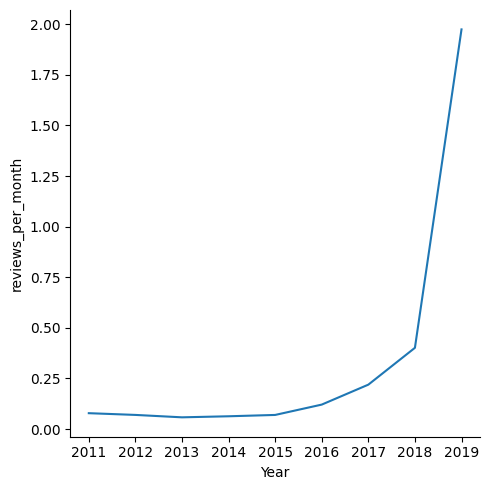

In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'])

df['Year'] = df['last_review'].dt.year
sns.relplot(x='Year', y='reviews_per_month', data=df, kind="line", ci=None)


In [ ]:
#drop the column Year because we don't need it anymore
# Assuming 'Year' is the column you want to drop
df.drop(columns='Year', inplace=True)

In [ ]:
# no clear trends!
# so i can fill the missing values of column last_review: mean/mode OR Forward/Backward Fill
# i will choose mean, because I will not sort the dataframe by dates and its not a time series application.
mean_last_rev = df['last_review'].mean()
df['last_review'].fillna(value=mean_last_rev, inplace=True)

### B- Clean "number of reviews" column

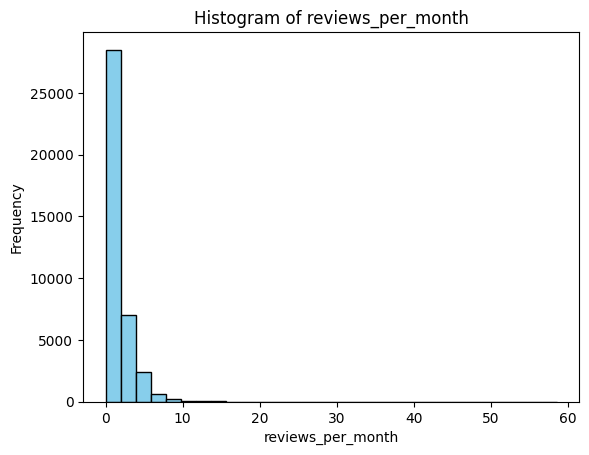

In [ ]:
#understand the distribution first
plt.hist(df['reviews_per_month'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of reviews_per_month')
plt.xlabel('reviews_per_month')
plt.ylabel('Frequency')
plt.show()

# the distribution is right-skewed

In [ ]:
mean_value = df['reviews_per_month'].mean()
median_value = df['reviews_per_month'].median()
mode_value = df['reviews_per_month'].mode().iloc[0]
std_dev = df['reviews_per_month'].std()

print(f"Mean: {mean_value}, Median: {median_value}, Mode: {mode_value}, Std Dev: {std_dev}")


Mean: 1.3732214298586618, Median: 0.72, Mode: 0.02, Std Dev: 1.6804419952744725


In [ ]:
# I will fill the NaN values by median because of the distribution
df['reviews_per_month'].fillna(value=df['reviews_per_month'].median(), inplace=True)


 ### C- Clean "name" & "host_name" columns

In [ ]:
# 16 names are missing: 0.03%
# 21 host_names are missing: 0.04
# too small/ few values are missing so we drop the rows: its feasible

df.dropna(subset=['name', 'host_name'], inplace=True)

In [ ]:
print(df.isnull().sum())

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


## **Visualizing individul columns**

<Axes: title={'center': 'room_type'}, xlabel='room_type', ylabel='count'>

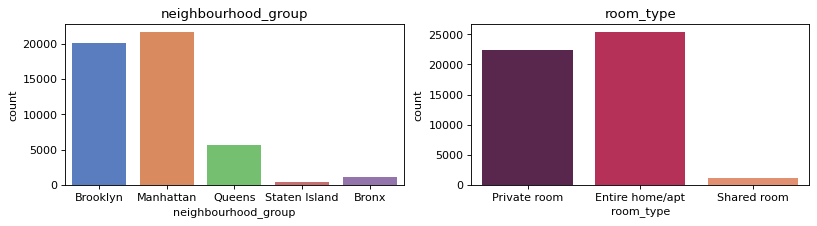

In [7]:
plt.figure(figsize=(12,12),dpi=80)
plt.subplot(4,2,1)
plt.title('neighbourhood_group')
sns.countplot(x='neighbourhood_group',data=df,palette='muted')

plt.subplot(4,2,2)
plt.title('room_type')
sns.countplot(x='room_type',data=df,palette='rocket')

## **Identifying Patterns and Relationships**

<Axes: title={'center': 'neighbourhood group vs number of reviews'}, xlabel='neighbourhood_group', ylabel='number_of_reviews'>

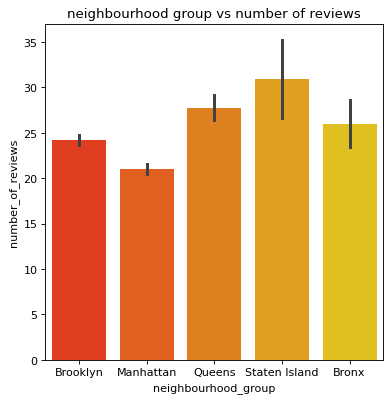

In [12]:
plt.figure(figsize=(12,12),dpi=80)
plt.subplot(2,2,1)
plt.title('neighbourhood group vs number of reviews')
sns.barplot(x='neighbourhood_group',y='number_of_reviews',data=df,palette='autumn')

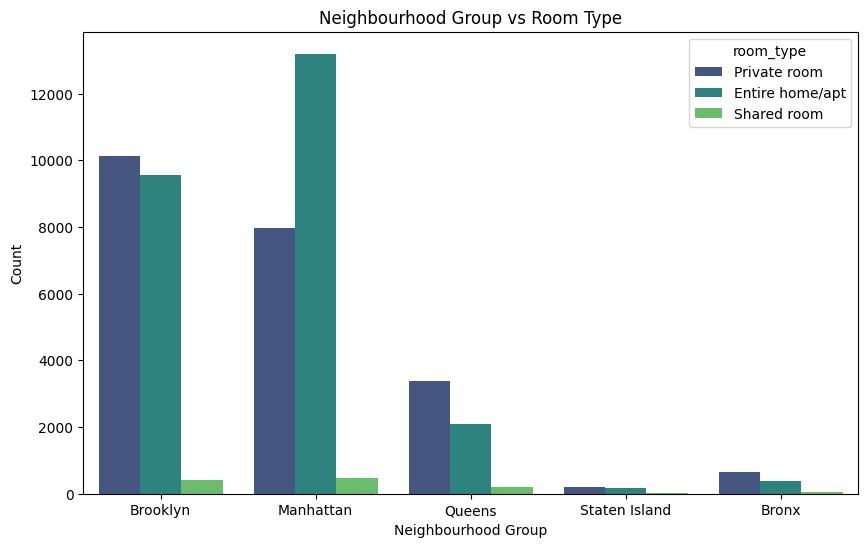

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='neighbourhood_group', hue='room_type', data=df, palette='viridis')
plt.title('Neighbourhood Group vs Room Type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

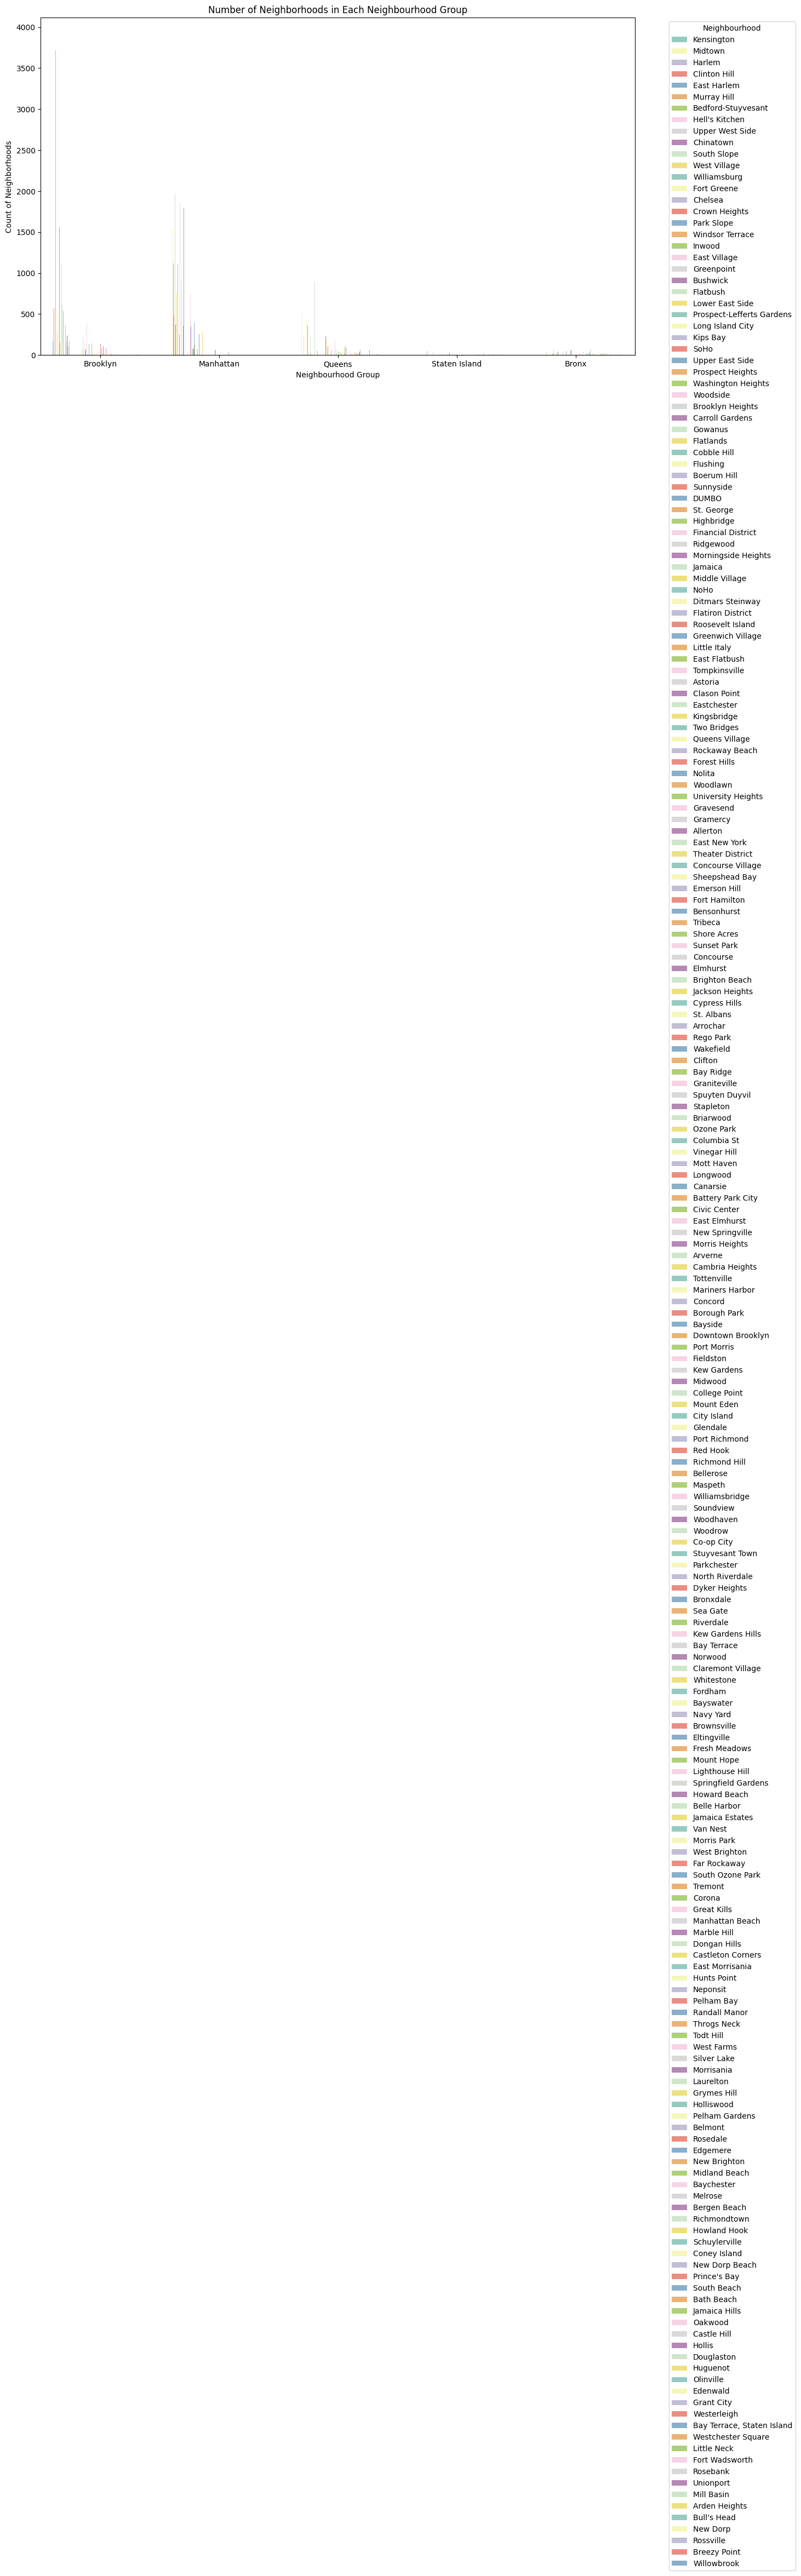

In [14]:
#How many neighbourhoods are in each neighbourhood group?

plt.figure(figsize=(14, 8))
sns.countplot(x='neighbourhood_group', data=df, hue='neighbourhood', palette='Set3')
plt.title('Number of Neighborhoods in Each Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count of Neighborhoods')
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## **Categorical Scatter Plot**

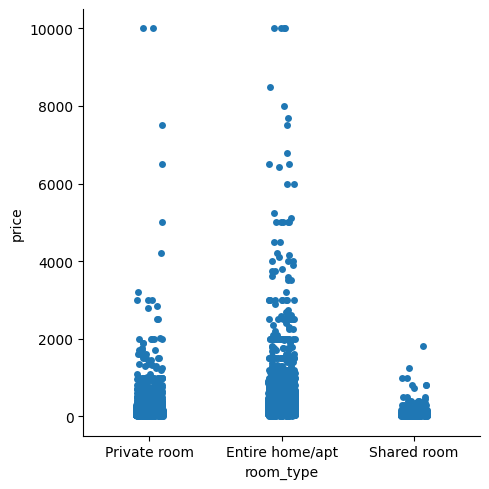

In [ ]:
# 1- Categorical Scatter Plot
# show the relation between room_type	and price
sns.catplot(x='room_type', y='price', data=df)

### Comments on Categorical Scatter Plot

(Approximately)
*   For Entire Home or Apartment most of the prices are between 0 and 1800.
*   For Private Rooms most of the prices are between 0 and 13000.
*   For Shared Rooms most of the prices are between 0 and 700.


Outliers:

*  One outlier for private room with price = 10000
* One outlier for shared room with price = 2000

## **Swarm Plot**

In [ ]:
print(df['neighbourhood_group'].nunique())
print(df['neighbourhood_group'].unique())
# we have 5 unique neighbourhood_groups

5
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 94.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 96.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 95.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 97.4% of the points cannot be plac

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 95.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 97.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 85.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


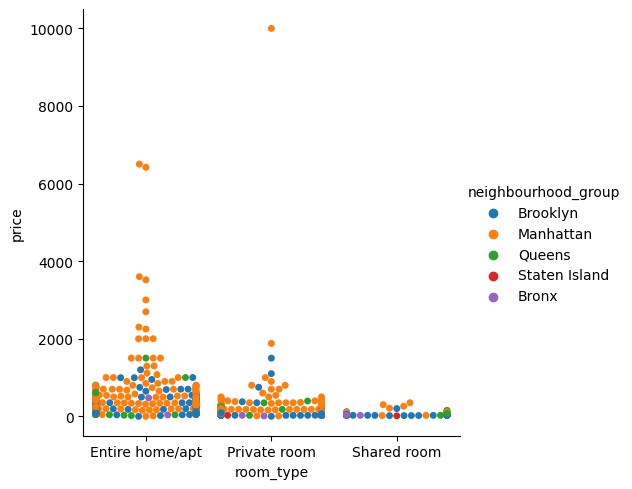

In [ ]:
sns.catplot(x='room_type', y='price', hue="neighbourhood_group", data=df.sample(frac=0.1), kind="swarm")

### Comments on Swarm Plot
**** This is ONLY on 10% OF THE WHOLE DATASET: due to some limitations!  

Notes:

*   I took the above categorical scatter plot (1) and added neighbourhood group as a hue value to differentiate between the three room types.

Interpretation:
*  It seems that shared rooms are the cheapest rooms (with differnet neighbourhood groups). However the entire home/apt are the most expensive and this makes sense.
*  For entire home/apt type: most of Manhattan's airbnbs prices are apprx between 500 and 1500. Also, there are some outliers with prices higher than 2000. But why? What could be the reasons for making these airbnbs higher than 2000?
*  For Private Room type: most of Manhattan's airbnbs prices are apprx between 500 and 1000.
* Prices for shared rooms (with differnet neighbourhood groups) are consistent, but other room types have somewhat wide range of prices.


